<AxesSubplot:>

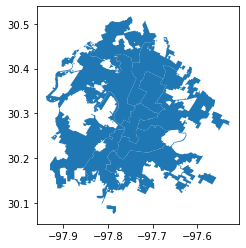

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

au = gpd.read_file('data/AustinDistrict.geojson')
au.plot()


In [2]:
audata = pd.read_csv('data/Austin.csv')
audata.head()

,Type,# Fat,Date,Month,Day,Hour,Time,x,y,Year
0,Motorcycle,2.0,2013-01-01,1,2,18.0,18:50:00,-97.687880,30.269347,2013
1,Motor Vehicle,1.0,2013-01-03,1,4,4.0,04:10:00,-97.803716,30.120220,2013
2,Motor Vehicle,1.0,2013-01-08,1,2,7.0,07:30:00,-97.687103,30.267664,2013
3,Motor Vehicle,1.0,2013-01-15,1,2,11.0,11:31:00,-97.791976,30.151241,2013
4,Motor Vehicle,1.0,2013-01-18,1,5,15.0,15:28:00,-97.681544,30.315898,2013


In [3]:
aufat = gpd.GeoDataFrame(audata, geometry=gpd.points_from_xy(audata['x'], audata['y']))
aufat.head()

,Type,# Fat,Date,Month,Day,Hour,Time,x,y,Year,geometry
0,Motorcycle,2.0,2013-01-01,1,2,18.0,18:50:00,-97.687880,30.269347,2013,POINT (-97.68788 30.26935)
1,Motor Vehicle,1.0,2013-01-03,1,4,4.0,04:10:00,-97.803716,30.120220,2013,POINT (-97.80372 30.12022)
2,Motor Vehicle,1.0,2013-01-08,1,2,7.0,07:30:00,-97.687103,30.267664,2013,POINT (-97.68710 30.26766)
3,Motor Vehicle,1.0,2013-01-15,1,2,11.0,11:31:00,-97.791976,30.151241,2013,POINT (-97.79198 30.15124)
4,Motor Vehicle,1.0,2013-01-18,1,5,15.0,15:28:00,-97.681544,30.315898,2013,POINT (-97.68154 30.31590)


<AxesSubplot:>

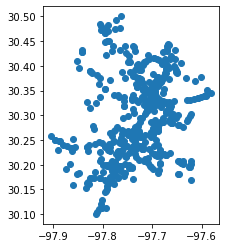

In [4]:
aufat.plot()

In [5]:
aus = gpd.sjoin(au, aufat)
aus.columns
aus = aus[['shape_area','geometry','index_right','Type','# Fat','Date','Month','Day','Hour','Year']]
aus

,shape_area,geometry,index_right,Type,# Fat,Date,Month,Day,Hour,Year
0,1343709394.90625,"MULTIPOLYGON (((-97.91273 30.13260, -97.91279 ...",91,Pedestrian,1.0,2014-04-26,4,6,6.0,2014
0,1343709394.90625,"MULTIPOLYGON (((-97.91273 30.13260, -97.91279 ...",260,Motor Vehicle,1.0,2016-07-24,7,7,2.0,2016
0,1343709394.90625,"MULTIPOLYGON (((-97.91273 30.13260, -97.91279 ...",143,Motor Vehicle,1.0,2015-02-12,2,4,12.0,2015
0,1343709394.90625,"MULTIPOLYGON (((-97.91273 30.13260, -97.91279 ...",299,Pedestrian,1.0,2016-12-23,12,5,22.0,2016
0,1343709394.90625,"MULTIPOLYGON (((-97.91273 30.13260, -97.91279 ...",386,Motor Vehicle,1.0,2018-03-11,3,7,14.0,2018
...,...,...,...,...,...,...,...,...,...,...
9,340206936.34375,"MULTIPOLYGON (((-97.73690 30.23232, -97.73802 ...",317,Bicycle,1.0,2017-03-28,3,2,19.0,2017
9,340206936.34375,"MULTIPOLYGON (((-97.73690 30.23232, -97.73802 ...",166,Pedestrian,1.0,2015-05-22,5,5,2.0,2015
9,340206936.34375,"MULTIPOLYGON (((-97.73690 30.23232, -97.73802 ...",86,Pedestrian,1.0,2014-04-02,4,3,7.0,2014
9,340206936.34375,"MULTIPOLYGON (((-97.73690 30.23232, -97.73802 ...",170,Pedestrian,1.0,2015-06-01,6,1,9.0,2015


<AxesSubplot:>

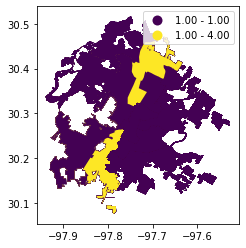

In [6]:
aus.plot('# Fat', legend=True, scheme='quantiles')

In [7]:
gp1 = aus[['shape_area','geometry','# Fat']].dissolve(by='shape_area', aggfunc='sum')
gp1

,geometry,# Fat
shape_area,,
1309138606.60742,"MULTIPOLYGON (((-97.55186 30.26211, -97.55199 ...",89.0
1317716330.48633,"MULTIPOLYGON (((-97.56749 30.14088, -97.56801 ...",76.0
1343709394.90625,"POLYGON ((-97.91273 30.13260, -97.91279 30.136...",32.0
1599594992.28711,"MULTIPOLYGON (((-97.77147 30.27382, -97.77174 ...",38.0
340206936.34375,"POLYGON ((-97.73690 30.23232, -97.73802 30.232...",36.0
394313084.318359,"POLYGON ((-97.68707 30.29819, -97.68797 30.298...",80.0
521166527.054688,"POLYGON ((-97.76546 30.19748, -97.76584 30.197...",79.0
657572153.171875,"MULTIPOLYGON (((-97.78759 30.07558, -97.78773 ...",44.0
735229642.175781,"POLYGON ((-97.74157 30.31541, -97.74249 30.315...",50.0


Text(0.5, 1.0, 'Accumulative Counts of Traffic Fatilites in Each City Council District of Austin\n2013~2019')

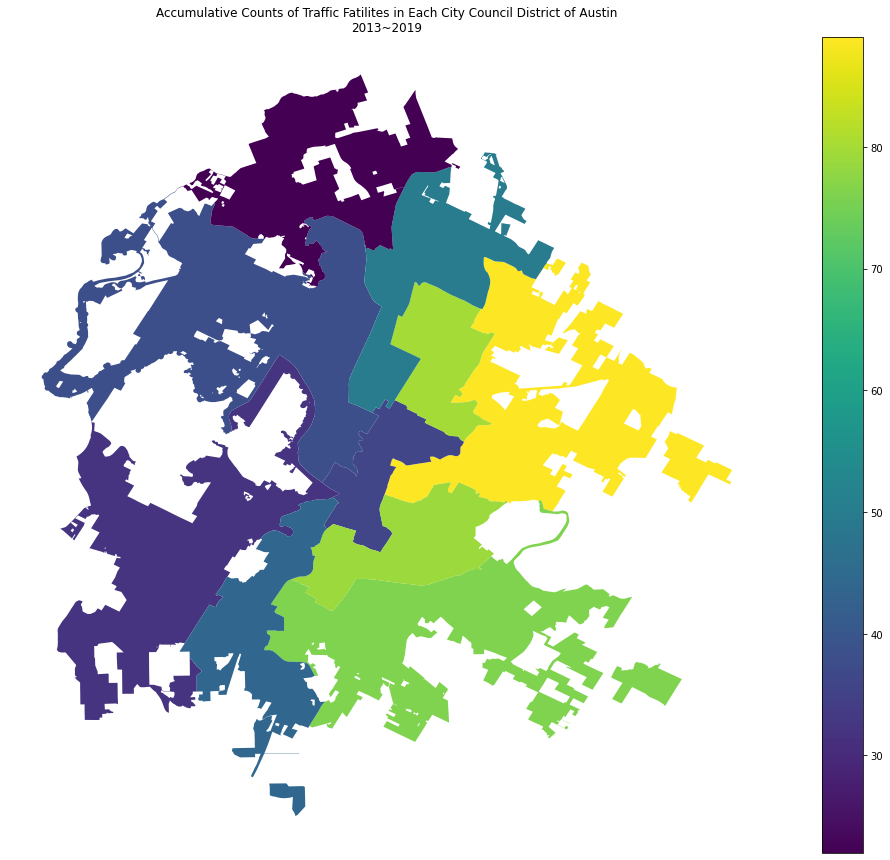

In [19]:
from matplotlib.pyplot import figure
gp1.plot('# Fat',legend=True,figsize=(20,15))
plt.axis('off')
plt.title('Accumulative Counts of Traffic Fatilites in Each City Council District of Austin\n2013~2019')